In [1]:
from mepextract.src import Extractor
from open_ephys.analysis import Session
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os

plt.style.use(['science', 'grid', 'notebook'])

## defining relevant folders and paths

In [2]:
spreadsheet = pd.read_csv('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/mep_sciatic.csv')

master_folder = '/Volumes/STORAGE 1.0/UNIC Research/Motor Evoked Potentials/motor_evoked_potentials_dataspell/MEPSSEP_raw_data'

In [8]:
spreadsheet

,index,session,animalID,cage,ear,phenotype,phenoCode,subrec,sessionClass,sessionType,currentLevel,isoflo,stim,trials_from,trials_to,notes,session_dates
0,37,2024-03-02 11:08:17,A565,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.68,1.60,NaN,1.0,60.0,1 pulse 100us,2024-03-02_11-08-17
1,42,2024-03-02 12:39:39,A580,NaN,NaN,5XFAD,2.0,1,MEP,sciatic,1.20,1.75,NaN,NaN,NaN,21pulses 100us pol black,2024-03-02_12-39-39
2,50,2024-03-02 14:50:32,A563,NaN,NaN,WT,1.0,1,MEP,sciatic,1.05,1.75,NaN,NaN,NaN,50us pulse,2024-03-02_14-50-32
3,51,2024-03-02 15:25:14,A579,NaN,NaN,WT,1.0,1,MEP,sciatic,0.65,NaN,NaN,NaN,NaN,ref on base of tail .65mA 100us single pulse,2024-03-02_15-25-14
4,58,2024-03-02 17:19:10,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,3.00,1.75,NaN,NaN,NaN,100us pulse single iso=1.75% ref on tail,2024-03-02_17-19-10
5,60,2024-03-02 17:25:14,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,1.50,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-25-14
6,61,2024-03-02 17:33:46,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,"50us pulse single, ref on tailbase",2024-03-02_17-33-46
7,62,2024-03-02 17:36:12,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,1.75,NaN,NaN,NaN,50us pulse single ref on tailbase,2024-03-02_17-36-12
8,63,2024-03-02 17:39:35,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.50,2.00,NaN,NaN,NaN,200us pulse double iso=2% ref on tailbase,2024-03-02_17-39-35
9,64,2024-03-02 17:48:55,A585,NaN,NaN,WT,1.0,1,MEP,sciatic,5.00,2.00,NaN,NaN,NaN,"200us pulse double, ref on tailbase across ears",2024-03-02_17-48-55


## Extracting MEPs for all trials

In [29]:
# path_to_raw_data = '/Volumes/STORAGE 1.0/UNIC Research/Motor Evoked Potentials/motor_evoked_potentials_dataspell/MEPSSEP_raw_data/2024-03-02_11-08-17'
# 
# session = Session(path_to_raw_data)
# recording = session.recordnodes[0].recordings[0]
# raw_data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=4000000)

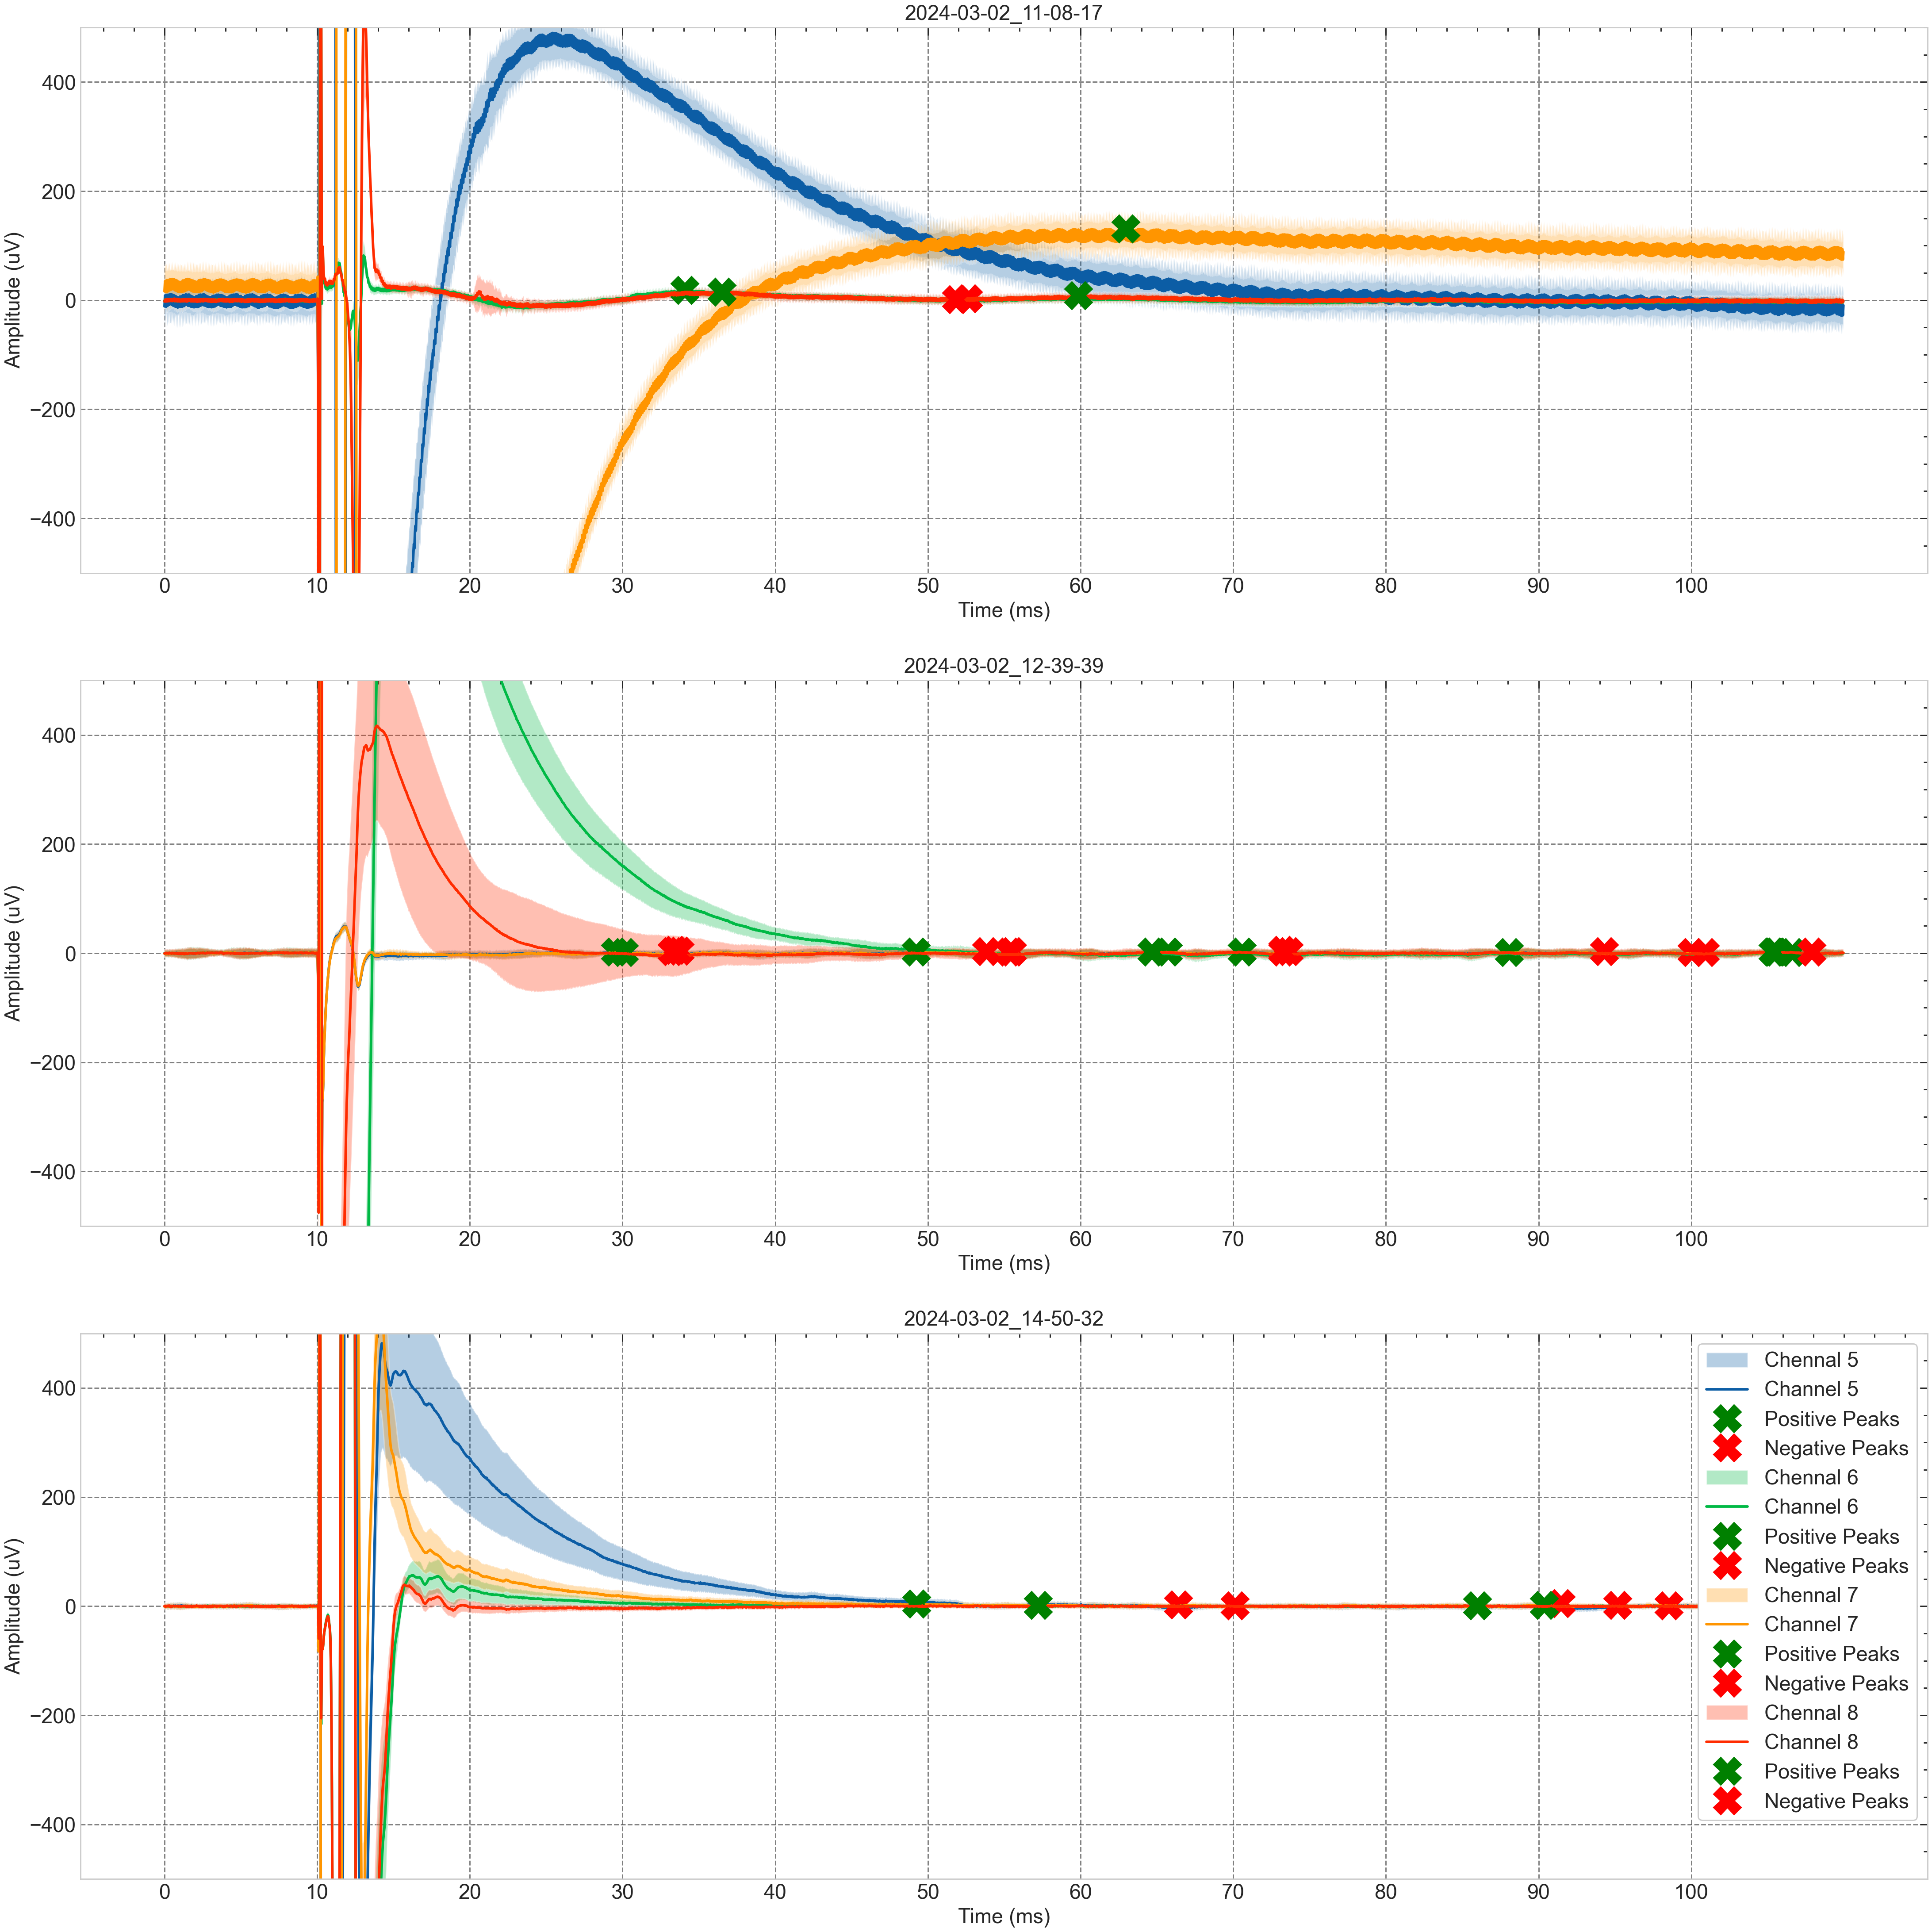

In [25]:
# number of trials to iterate over
n = 3

fig, ax = plt.subplots(3,1, figsize = (21,7*n), dpi = 210)

for i in range(n):
    # trial name
    trial = spreadsheet.session_dates[i]
    
    # defining extractor object
    extractor = Extractor(master_folder = master_folder, trial = trial)
    extractor.pre_stimulus = 300
    extractor.post_stimulus = 3000
    extractor.extract_raw()
    extractor.extract_events(event_channel_number=13)
    extractor.get_event_data()
    
    # temporary data
    data = extractor.mep
    
    # calculating mean and std
    mean_data = np.mean(data[4:8, :, :],axis = 2)
    inv_data = -mean_data
    std_data = np.std(data[4:8,:,:], axis = 2)
   
    # plotting parameters
    time_axis = np.arange(mean_data.shape[1]) * (1000 / 30000)
    tick_positions = np.arange(0, np.max(time_axis), 10)
    
    for channel_index in range(0,4):
        
        # plot mean and error bars
        upper_bound = mean_data[channel_index] + std_data[channel_index]
        lower_bound = mean_data[channel_index] - std_data[channel_index]
        
        ax[i].fill_between(time_axis, upper_bound, lower_bound, alpha = 0.3, label =f'Chennal {channel_index + 5}')
        ax[i].plot(time_axis,mean_data[channel_index], label = f'Channel {channel_index + 5}')
        
        # find peaks and plot
        positive_peaks, positive_properties = find_peaks(mean_data[channel_index], threshold=0.2, height= 0.5, distance = 500, prominence = 0.3, width=5)
        negative_peaks, negative_properties = find_peaks(-mean_data[channel_index], threshold=0.2, height = 0.5, distance = 500, prominence = 0.3, width = 5)
        
        ax[i].plot(positive_peaks * (1000/30000), mean_data[channel_index][positive_peaks], "X", label = 'Positive Peaks', color = "green", ms = 21)
        ax[i].plot(negative_peaks * (1000/30000), -mean_data[channel_index][negative_peaks], "X", label = 'Negative Peaks', color = "red", ms = 21)
        
        # plot aesthetics
        ax[i].set_xlabel('Time (ms)')
        ax[i].set_ylabel('Amplitude (uV)')
        ax[i].set_xticks(tick_positions)
        # ax[i].legend()
        ax[i].set_ylim(-500,500)
        ax[i].set_title(trial)
    
plt.legend()   
plt.tight_layout()       
plt.show()